# Feature selection

### The curse of dimensionality

In general, we don't want to learn with an arbitrarily large number of features.

We can still improve on the 2 or 3 variables in a lot of 'standard' modeling tasks (e.g. modeling facies from a few logs, or porosity from facies, or permeability from porosity). But the earth is massively high-dimensional... what's the right number, and why does it matter?

- High-dimensional models are hard to explain.
- High-dimensional datasets are hard to visualize.
- We need a lot of data to properly sample the joint distributions of high-dimensional datasets. 
- We're more likely to have redundant features in the data.

## Radius of unit circle

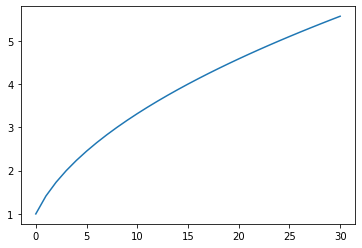

In [7]:
import matplotlib.pyplot as plt
import numpy as np

radii = [np.linalg.norm(np.ones(dim)) for dim in range(1, 32)]
    
plt.plot(radii)

## Distance between points

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def dists(dim, n=1000, scale=1):
    X = np.random.random(size=(n, dim)) * scale
    d = pdist(X)
    return f"range: {np.min(d):.3f}-{np.max(d):.3f}, mean: {np.mean(d):.3f}, stdev: {np.std(d):.4f}, rsd: {np.std(d)*100/np.mean(d):.4f}"

In [2]:
dists(1)

'range: 0.000-0.996, mean: 0.340, stdev: 0.2403, rsd: 70.6605'

In [11]:
dists(2), np.sqrt(2)

('range: 0.001-1.360, mean: 0.514, stdev: 0.2449, rsd: 47.6666',
 1.4142135623730951)

In [12]:
dists(3), np.sqrt(3)

('range: 0.008-1.618, mean: 0.657, stdev: 0.2484, rsd: 37.7912',
 1.7320508075688772)

In [14]:
dists(10, n=10000), np.sqrt(10)

('range: 0.139-2.486, mean: 1.269, stdev: 0.2449, rsd: 19.3015',
 3.1622776601683795)

In [15]:
dists(40, n=10000), np.sqrt(10)

('range: 1.186-3.829, mean: 2.568, stdev: 0.2423, rsd: 9.4356',
 3.1622776601683795)

In [6]:
dists(100)

'range: 2.912-5.256, mean: 4.072, stdev: 0.2417, rsd: 5.9355'

In [7]:
dists(1000)

'range: 11.789-14.011, mean: 12.916, stdev: 0.2425, rsd: 1.8774'

In [38]:
dists(10000, n=100)

'range: 39.816-41.688, mean: 40.833, stdev: 0.2369, rsd: 0.5803'

In [57]:
dists(100_000, n=100)

'range: 128.055-130.063, mean: 129.075, stdev: 0.2413, rsd: 0.1869'

In [65]:
dists(10_000_000, n=10)

'range: 1290.523-1291.472, mean: 1290.979, stdev: 0.2145, rsd: 0.0166'